In [90]:
import pandas as pd

import seaborn as sns
sns.set_style("dark")

import numpy as np

In [91]:
df = pd.read_csv('supply_chain_train.csv')

In [92]:
df_test = pd.read_csv('supply_chain_test.csv')

----------------------------------------------------------------

### Exploración de datos

In [93]:
df_train = df.copy()

In [94]:
df_train.head()

train_idx  CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0          0  713071383            54      F                1         Unknown   
1          1  714246333            58      F                4     High School   
2          2  718206783            45      F                4         Unknown   
3          3  721096983            34      F                2        Graduate   
4          4  720028683            49      F                2     High School   

  Marital_Status Income_Category Card_Category  Months_on_book  ...  \
0         Single         Unknown          Blue              36  ...   
1        Married         Unknown          Blue              48  ...   
2         Single  Less than $40K          Gold              36  ...   
3         Single  Less than $40K          Blue              36  ...   
4        Married     $40K - $60K          Blue              39  ...   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3        3723.0                 1728           1995.0   
1                      3        5396.0                 1803           3593.0   
2                      3       15987.0                 1648          14339.0   
3                      4        3625.0                 2517           1108.0   
4                      4        2720.0                 1926            794.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 0.595             8554              99                0.678   
1                 0.493             2107              39                0.393   
2                 0.732             1436              36                1.250   
3                 1.158             2616              46                1.300   
4                 0.602             3806              61                0.794   

   Avg_Utilization_Ratio  Attrition_Flag  
0                  0.464               1  
1                  0.334               0  
2                  0.103               1  
3                  0.694               1  
4                  0.708               1  

[5 rows x 22 columns]

In [95]:
df_train.shape

(8101, 22)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   train_idx                 8101 non-null   int64  
 1   CLIENTNUM                 8101 non-null   int64  
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   object 
 4   Dependent_count           8101 non-null   int64  
 5   Education_Level           8101 non-null   object 
 6   Marital_Status            8101 non-null   object 
 7   Income_Category           8101 non-null   object 
 8   Card_Category             8101 non-null   object 
 9   Months_on_book            8101 non-null   int64  
 10  Total_Relationship_Count  8101 non-null   int64  
 11  Months_Inactive_12_mon    8101 non-null   int64  
 12  Contacts_Count_12_mon     8101 non-null   int64  
 13  Credit_Limit              8101 non-null   float64
 14  Total_Re

In [97]:
df_train.describe()

train_idx     CLIENTNUM  Customer_Age  Dependent_count  \
count  8101.000000  8.101000e+03   8101.000000      8101.000000   
mean   4050.000000  7.391329e+08     46.306382         2.334773   
std    2338.701598  3.691912e+07      8.022527         1.289564   
min       0.000000  7.080821e+08     26.000000         0.000000   
25%    2025.000000  7.130534e+08     41.000000         1.000000   
50%    4050.000000  7.178860e+08     46.000000         2.000000   
75%    6075.000000  7.728464e+08     52.000000         3.000000   
max    8100.000000  8.283431e+08     70.000000         5.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count     8101.000000               8101.000000             8101.000000   
mean        35.923590                  3.813233                2.346871   
std          8.024359                  1.551838                1.014177   
min         13.000000                  1.000000                0.000000   
25%         31.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            8101.000000   8101.000000          8101.000000   
mean                2.450315   8636.548068          1160.382792   
std                 1.100687   9086.419557           815.504293   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           326.000000   
50%                 2.000000   4549.000000          1273.000000   
75%                 3.000000  11128.000000          1782.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      8101.000000           8101.000000      8101.000000     8101.000000   
mean       7476.165276              0.760809      4402.988150       64.907789   
std        9080.279910              0.216668      3401.709545       23.556379   
min           3.000000              0.000000       510.000000       10.000000   
25%        1341.000000              0.632000      2160.000000       45.000000   
50%        3495.000000              0.738000      3897.000000       67.000000   
75%        9942.000000              0.859000      4739.000000       81.000000   
max       34516.000000              2.675000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Attrition_Flag  
count          8101.000000            8101.000000     8101.000000  
mean              0.712176               0.273187        0.839526  
std               0.239321               0.274595        0.367068  
min               0.000000               0.000000        0.000000  
25%               0.583000               0.022000        1.000000  
50%               0.702000               0.174000        1.000000  
75%               0.818000               0.497000        1.000000  
max               3.714000               0.999000        1.000000

In [98]:
df_train.corr()

C:\Users\kendr\AppData\Local\Temp\ipykernel_12880\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


train_idx  CLIENTNUM  Customer_Age  Dependent_count  \
train_idx                  1.000000   0.003892     -0.001941        -0.003070   
CLIENTNUM                  0.003892   1.000000      0.007326        -0.007080   
Customer_Age              -0.001941   0.007326      1.000000        -0.115442   
Dependent_count           -0.003070  -0.007080     -0.115442         1.000000   
Months_on_book             0.010441   0.134635      0.792430        -0.101181   
Total_Relationship_Count  -0.007855   0.009358     -0.008057        -0.033282   
Months_Inactive_12_mon     0.002101   0.006672      0.050469         0.000310   
Contacts_Count_12_mon      0.001954   0.005028     -0.000541        -0.045685   
Credit_Limit              -0.009055   0.008543      0.001502         0.070340   
Total_Revolving_Bal       -0.003896  -0.001445      0.010867         0.002747   
Avg_Open_To_Buy           -0.008711   0.008679      0.000527         0.070141   
Total_Amt_Chng_Q4_Q1       0.003627   0.021020     -0.068084        -0.036242   
Total_Trans_Amt            0.019622  -0.021440     -0.047228         0.017063   
Total_Trans_Ct             0.019790  -0.003796     -0.070586         0.040036   
Total_Ct_Chng_Q4_Q1        0.000206   0.002594     -0.004960         0.005435   
Avg_Utilization_Ratio     -0.000519  -0.004018      0.006002        -0.035069   
Attrition_Flag             0.000638   0.047136     -0.035203        -0.020550   

                          Months_on_book  Total_Relationship_Count  \
train_idx                       0.010441                 -0.007855   
CLIENTNUM                       0.134635                  0.009358   
Customer_Age                    0.792430                 -0.008057   
Dependent_count                -0.101181                 -0.033282   
Months_on_book                  1.000000                 -0.005419   
Total_Relationship_Count       -0.005419                  1.000000   
Months_Inactive_12_mon          0.077788                 -0.011546   
Contacts_Count_12_mon           0.000933                  0.053871   
Credit_Limit                    0.006899                 -0.072460   
Total_Revolving_Bal             0.010743                  0.012873   
Avg_Open_To_Buy                 0.005939                 -0.073665   
Total_Amt_Chng_Q4_Q1           -0.058055                  0.049851   
Total_Trans_Amt                -0.040674                 -0.345336   
Total_Trans_Ct                 -0.053967                 -0.235047   
Total_Ct_Chng_Q4_Q1            -0.009988                  0.034198   
Avg_Utilization_Ratio          -0.004777                  0.068130   
Attrition_Flag                 -0.022270                  0.150889   

                          Months_Inactive_12_mon  Contacts_Count_12_mon  \
train_idx                               0.002101               0.001954   
CLIENTNUM                               0.006672               0.005028   
Customer_Age                            0.050469              -0.000541   
Dependent_count                         0.000310              -0.045685   
Months_on_book                          0.077788               0.000933   
Total_Relationship_Count               -0.011546               0.053871   
Months_Inactive_12_mon                  1.000000               0.030814   
Contacts_Count_12_mon                   0.030814               1.000000   
Credit_Limit                           -0.022438               0.028083   
Total_Revolving_Bal                    -0.040999              -0.060309   
Avg_Open_To_Buy                        -0.018771               0.033518   
Total_Amt_Chng_Q4_Q1                   -0.045081              -0.018638   
Total_Trans_Amt                        -0.036037              -0.118393   
Total_Trans_Ct                         -0.038684              -0.161603   
Total_Ct_Chng_Q4_Q1                    -0.048167              -0.092385   
Avg_Utilization_Ratio                  -0.003389              -0.063219   
Attrition_Flag                 

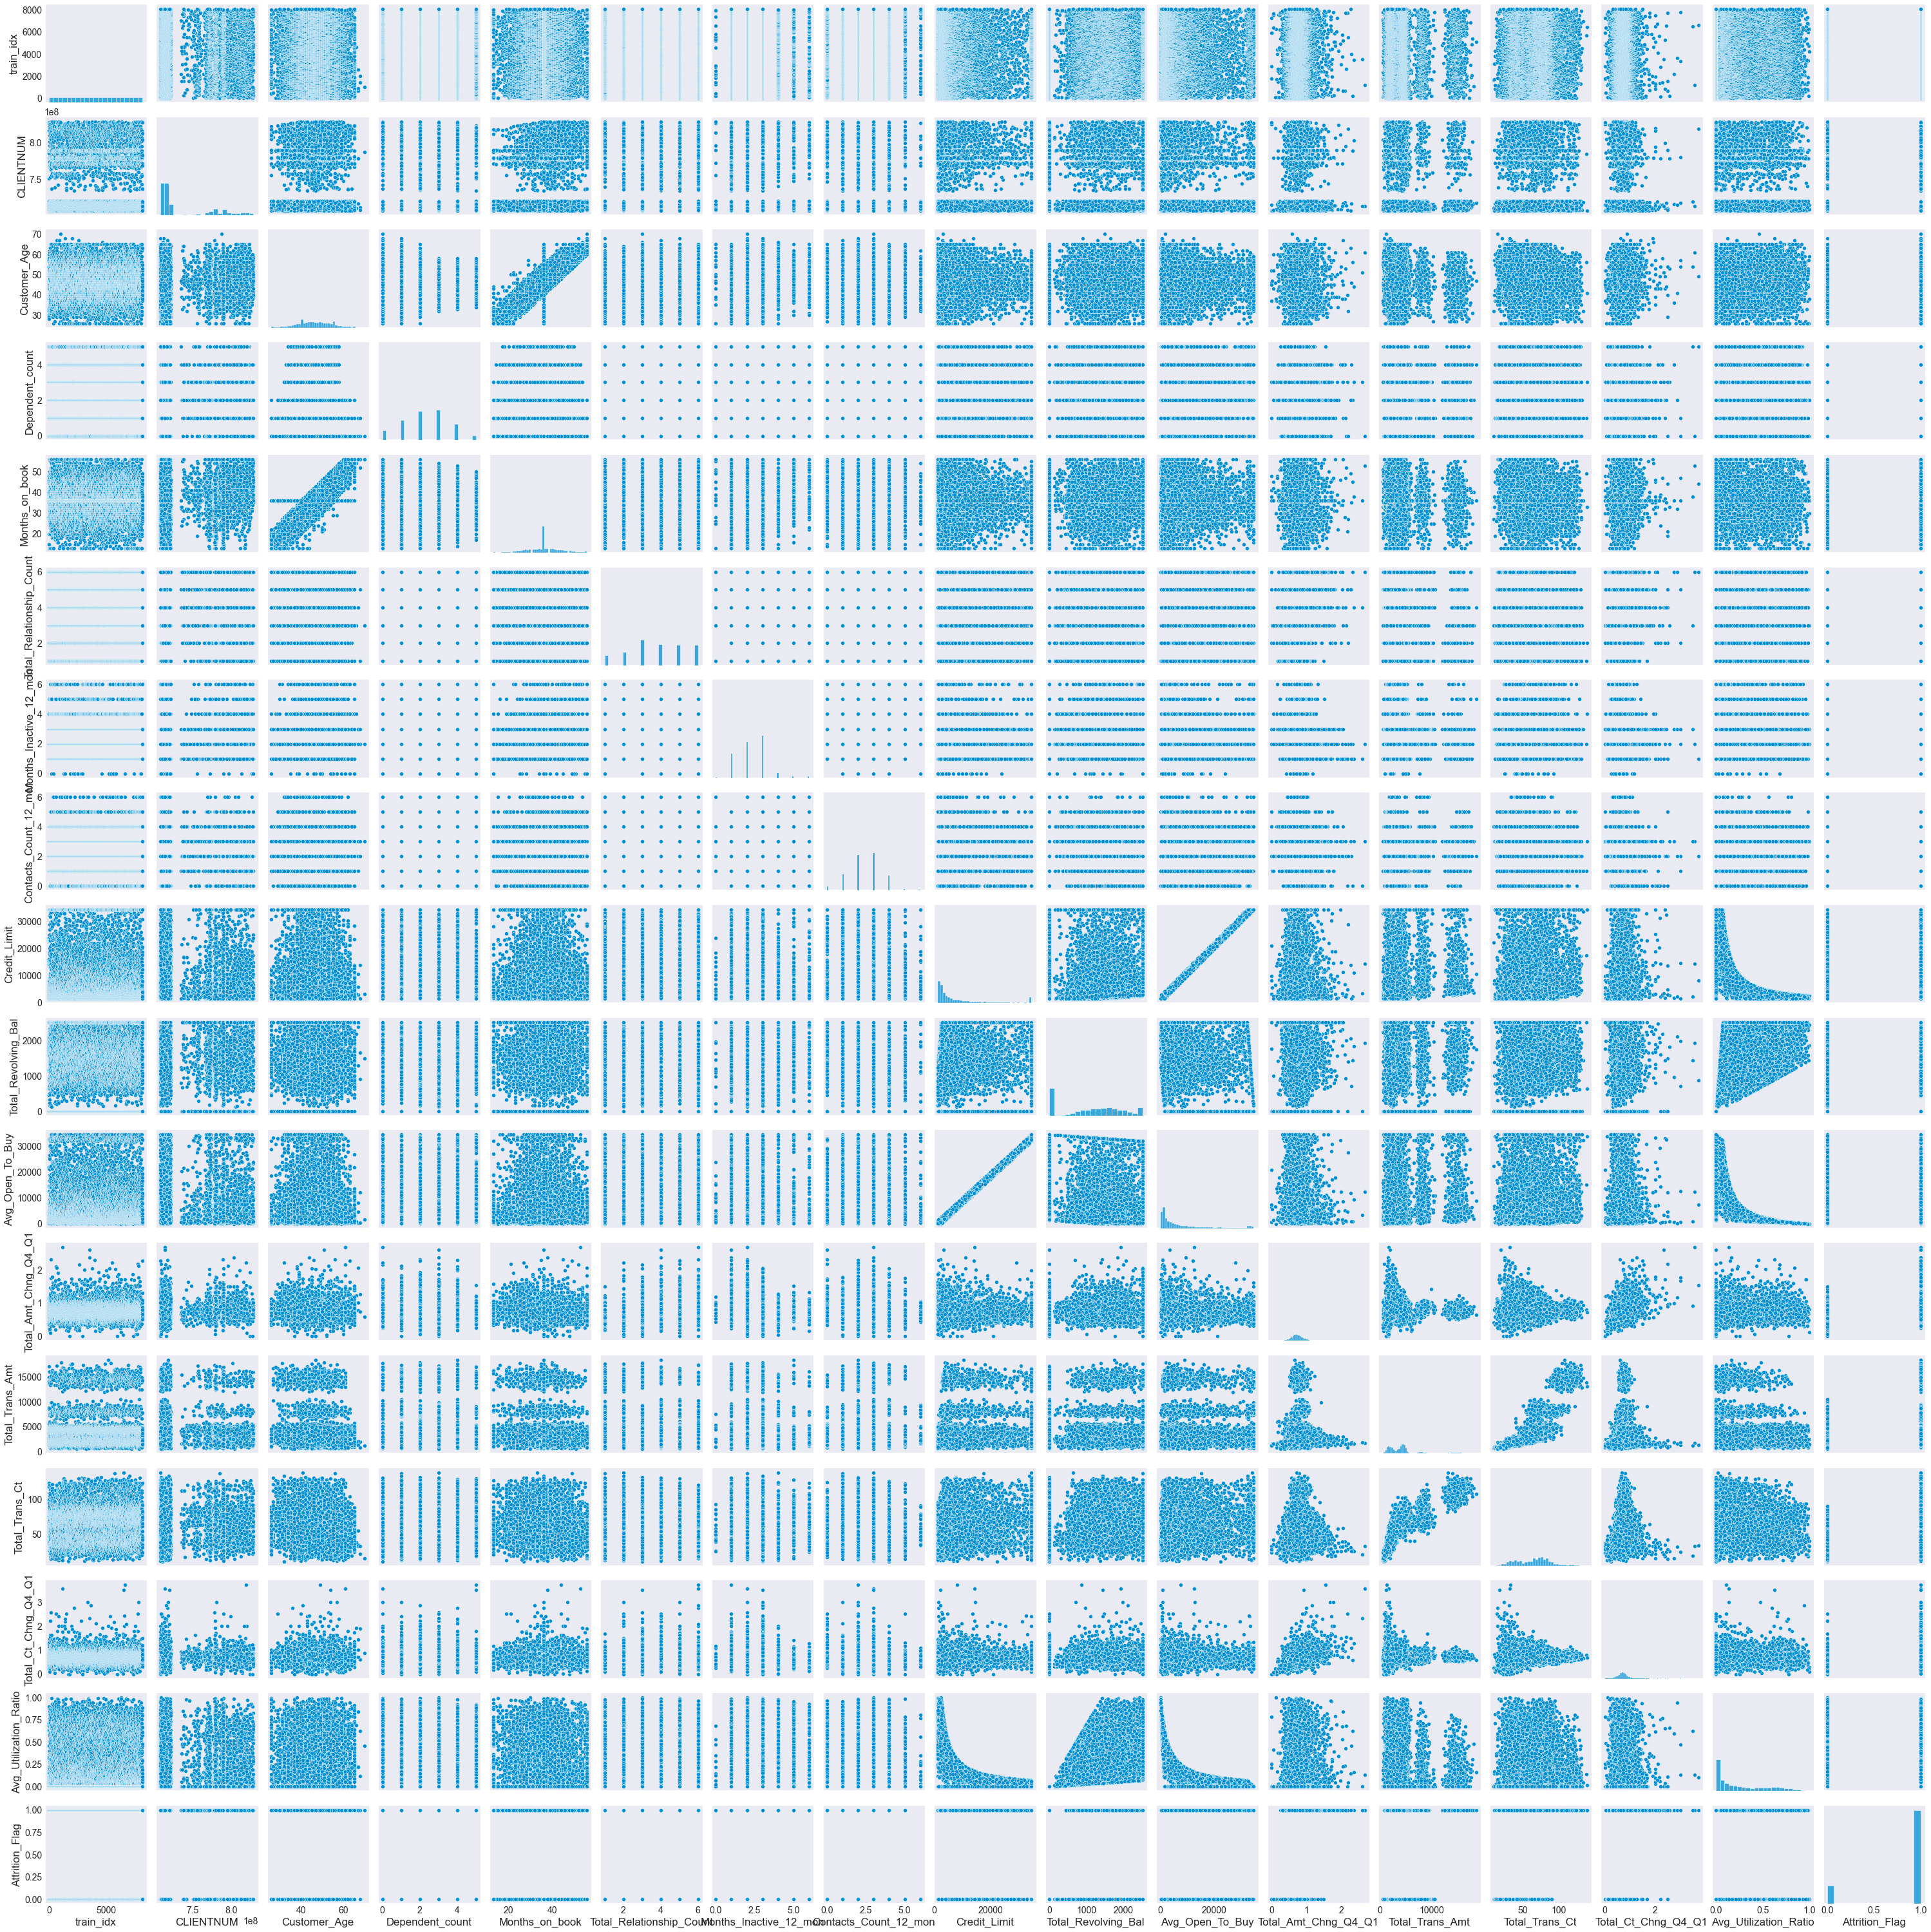

In [99]:
sns.pairplot(df_train)

---------------------

In [100]:
import matplotlib.pyplot as plt

C:\Users\kendr\AppData\Local\Temp\ipykernel_12880\1886267843.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=3, ax=ax)


<AxesSubplot:>

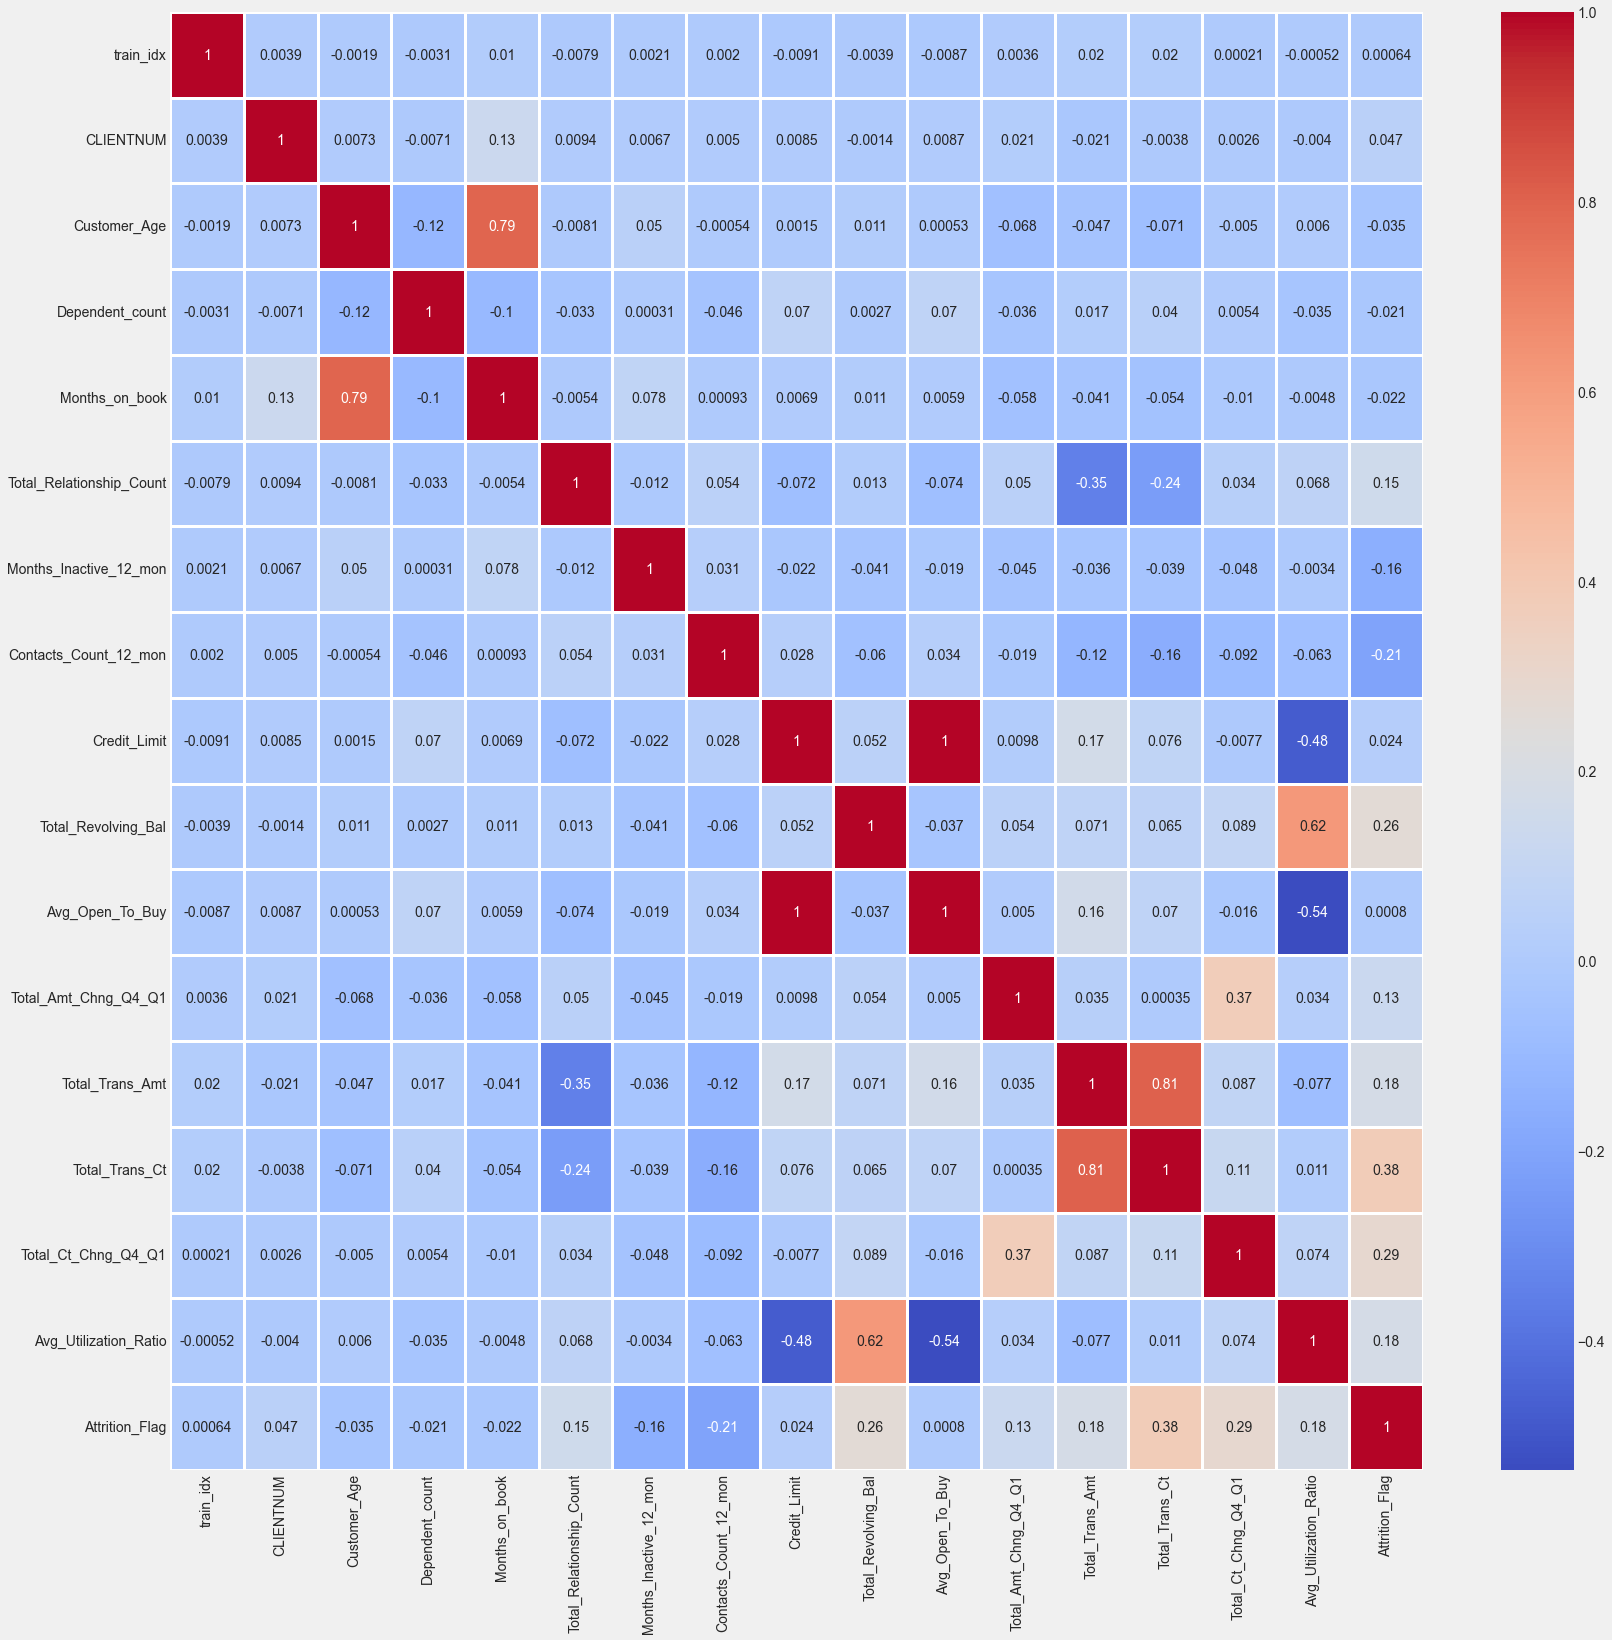

In [101]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=3, ax=ax)

In [102]:
df_train.corr().Attrition_Flag.sort_values()

C:\Users\kendr\AppData\Local\Temp\ipykernel_12880\1257281766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr().Attrition_Flag.sort_values()


Contacts_Count_12_mon      -0.211327
Months_Inactive_12_mon     -0.156552
Customer_Age               -0.035203
Months_on_book             -0.022270
Dependent_count            -0.020550
train_idx                   0.000638
Avg_Open_To_Buy             0.000803
Credit_Limit                0.024437
CLIENTNUM                   0.047136
Total_Amt_Chng_Q4_Q1        0.128559
Total_Relationship_Count    0.150889
Total_Trans_Amt             0.178078
Avg_Utilization_Ratio       0.179838
Total_Revolving_Bal         0.263335
Total_Ct_Chng_Q4_Q1         0.288937
Total_Trans_Ct              0.380618
Attrition_Flag              1.000000
Name: Attrition_Flag, dtype: float64

In [103]:
df_train.corr().Attrition_Flag.abs().nlargest(n=8)

C:\Users\kendr\AppData\Local\Temp\ipykernel_12880\1434364200.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr().Attrition_Flag.abs().nlargest(n=8)


Attrition_Flag            1.000000
Total_Trans_Ct            0.380618
Total_Ct_Chng_Q4_Q1       0.288937
Total_Revolving_Bal       0.263335
Contacts_Count_12_mon     0.211327
Avg_Utilization_Ratio     0.179838
Total_Trans_Amt           0.178078
Months_Inactive_12_mon    0.156552
Name: Attrition_Flag, dtype: float64

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

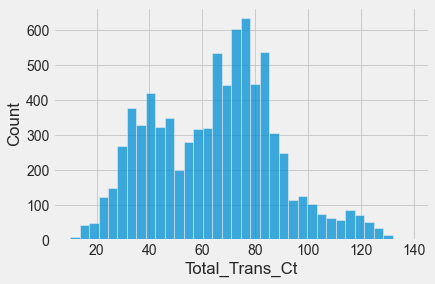

In [104]:
sns.histplot(data=df_train, x='Total_Trans_Ct')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

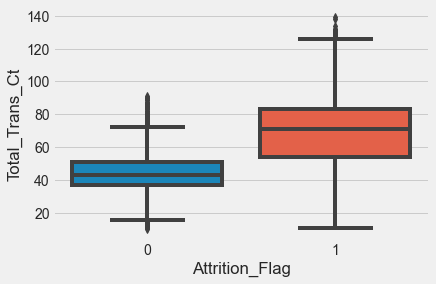

In [105]:
sns.boxplot(data=df_train, x='Attrition_Flag', y='Total_Trans_Ct')

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

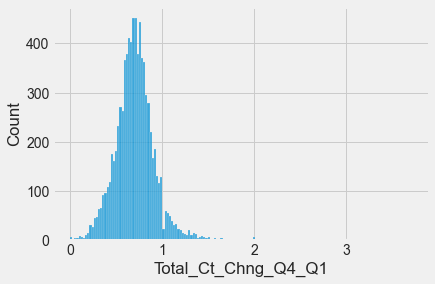

In [106]:
sns.histplot(data=df_train, x='Total_Ct_Chng_Q4_Q1')

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

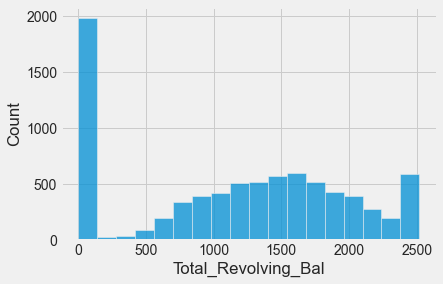

In [107]:
sns.histplot(data=df_train, x='Total_Revolving_Bal')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

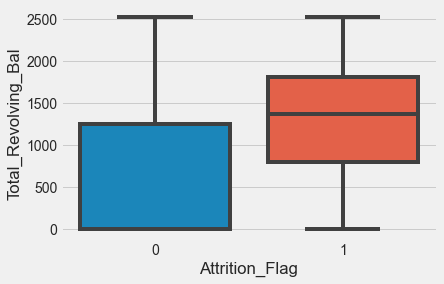

In [108]:
sns.boxplot(data=df_train, x='Attrition_Flag', y='Total_Revolving_Bal')

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

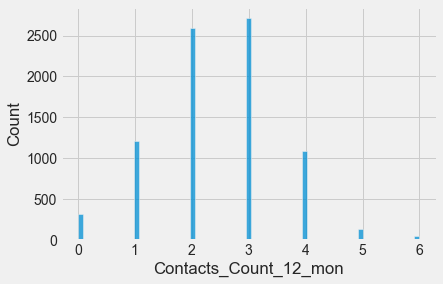

In [109]:
sns.histplot(data=df_train, x='Contacts_Count_12_mon')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

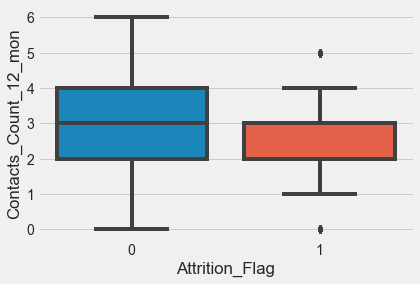

In [110]:
sns.boxplot(data=df_train, x='Attrition_Flag', y='Contacts_Count_12_mon')

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

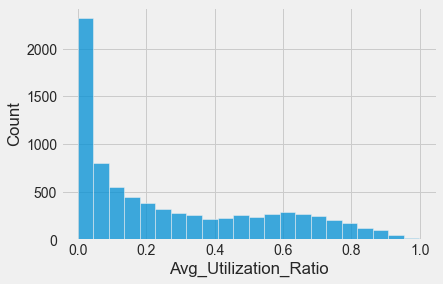

In [111]:
sns.histplot(data=df_train, x='Avg_Utilization_Ratio')

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

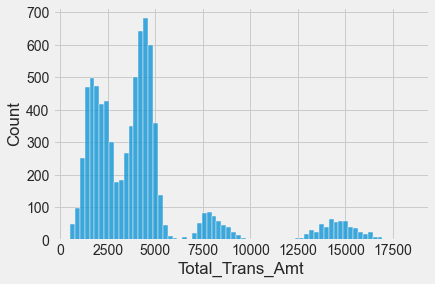

In [112]:
sns.histplot(data=df_train, x='Total_Trans_Amt')

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

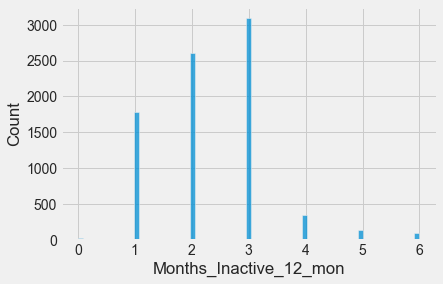

In [113]:
sns.histplot(data=df_train, x='Months_Inactive_12_mon')

In [114]:
# cambio de valores Unknown a NaN
df_train.replace('Unknown', np.nan, inplace=True)

In [115]:
df_train = pd.get_dummies(df_train, columns=["Gender", "Education_Level", 
                                             "Marital_Status", "Income_Category",
                                             "Card_Category"], drop_first=True)

In [116]:
df_train.sample(5)

train_idx  CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
7844       7844  809589783            41                4              36   
6441       6441  818502708            51                1              46   
1320       1320  719006508            34                2              36   
1432       1432  715338783            32                1              36   
6708       6708  790119408            48                3              41   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
7844                         3                       3                      2   
6441                         5                       3                      2   
1320                         5                       1                      3   
1432                         4                       2                      2   
6708                         5                       3                      2   

      Credit_Limit  Total_Revolving_Bal  ...  Education_Level_Uneducated  \
7844       16268.0                  817  ...                           0   
6441        2284.0                 1674  ...                           1   
1320        2763.0                 1913  ...                           0   
1432        2999.0                    0  ...                           0   
6708        4960.0                    0  ...                           1   

      Marital_Status_Married  Marital_Status_Single  \
7844                       1                      0   
6441                       0                      1   
1320                       1                      0   
1432                       0                      1   
6708                       1                      0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
7844                            1                            0   
6441                            1                            0   
1320                            0                            1   
1432                            0                            1   
6708                            0                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
7844                             0                               0   
6441                             0                               0   
1320                             0                               0   
1432                             0                               0   
6708                             0                               1   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
7844                   0                       0                     1  
6441                   0                       0                     0  
1320                   0                       0                     0  
1432                   0                       0                     0  
6708                   0                       0                     0  

[5 rows x 32 columns]

In [117]:
df_train.columns

Index(['train_idx', 'CLIENTNUM', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag', 'Gender_M', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

### Normalización de datos

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
# Seleccionar las columnas que se desean normalizar
columns_to_normalize = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                        'Total_Relationship_Count', 'Months_Inactive_12_mon',
                        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
                       ]

In [120]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

In [121]:
# Ajustar y transformar las columnas seleccionadas
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])

In [122]:
df_train.sample(5)

train_idx  CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
1340       1340  778915233      0.568182              0.0        0.441860   
3747       3747  772643058      0.727273              0.6        0.813953   
5018       5018  710676483      0.272727              0.4        0.534884   
4200       4200  711298458      0.295455              0.6        0.302326   
1370       1370  807971658      0.477273              0.6        0.674419   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1340                       0.6                0.333333               0.500000   
3747                       1.0                0.333333               0.500000   
5018                       0.6                0.333333               0.333333   
4200                       0.8                0.333333               0.833333   
1370                       0.0                0.333333               0.500000   

      Credit_Limit  Total_Revolving_Bal  ...  Education_Level_Uneducated  \
1340      0.009635             0.131506  ...                           0   
3747      0.041167             0.728645  ...                           0   
5018      0.125483             0.000000  ...                           0   
4200      0.022725             0.000000  ...                           0   
1370      0.067438             1.000000  ...                           0   

      Marital_Status_Married  Marital_Status_Single  \
1340                       1                      0   
3747                       1                      0   
5018                       1                      0   
4200                       1                      0   
1370                       1                      0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
1340                            0                            0   
3747                            0                            0   
5018                            0                            0   
4200                            0                            0   
1370                            0                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
1340                             0                               1   
3747                             0                               1   
5018                             0                               1   
4200                             0                               1   
1370                             0                               1   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
1340                   0                       0                     0  
3747                   0                       0                     0  
5018                   0                       0                     0  
4200                   0                       0                     0  
1370                   0                       0                     0  

[5 rows x 32 columns]

--------------

In [123]:
df_train.isnull().sum()

train_idx                         0
CLIENTNUM                         0
Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Attrition_Flag                    0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K

In [124]:
df_train.dtypes

train_idx                           int64
CLIENTNUM                           int64
Customer_Age                      float64
Dependent_count                   float64
Months_on_book                    float64
Total_Relationship_Count          float64
Months_Inactive_12_mon            float64
Contacts_Count_12_mon             float64
Credit_Limit                      float64
Total_Revolving_Bal               float64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                   float64
Total_Trans_Ct                    float64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Attrition_Flag                      int64
Gender_M                            uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Marital_Status_Married            

---------------------

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

### Train test split

In [193]:
target = 'Attrition_Flag'

In [194]:
X = df_train.drop(target, axis=1)
y = df_train[target]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

-------------

### Baseline

Baseline como punto de referencia

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

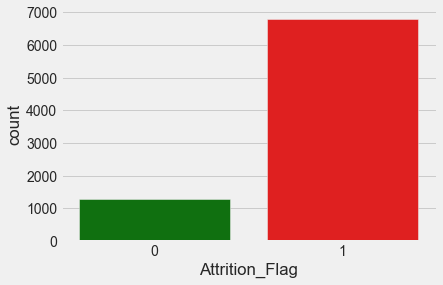

In [196]:
sns.countplot(x=df_train.Attrition_Flag, palette=['green', 'red'])

In [197]:
baseline = y_train.mean()

In [198]:
baseline

0.8405864197530865

----------------------

Train Error

In [199]:
(((y_train - baseline) ** 2).mean() ** 0.5).round(3)

0.366

Test Error

In [200]:
(((y_test - baseline) ** 2).mean() ** 0.5).round(3)

0.371

------------

## Prueba y busqueda del mejor modelo

### Regresión logística

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
log = LogisticRegression(max_iter=10000)

In [203]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [204]:
log_test_score = accuracy_score(
    y_pred=log.predict(X_test),
    y_true=y_test,
)

In [205]:
print(f"The test score with logistic regression is {log_test_score.round(3)}")

The test score with logistic regression is 0.835


-----------

### Decision tree classifier

In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "max_depth": [4, 6, 7, 8],
        "min_samples_split": [10, 20, 40, 90],
    },
    cv=5,
    verbose=1,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [208]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 7, 8],
                         'min_samples_split': [10, 20, 40, 90]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [209]:
tree_test_score = accuracy_score(
    y_pred=tree.predict(X_test),
    y_true=y_test
)

In [210]:
print(f"The test score with decision tree is {tree_test_score.round(3)}")

The test score with decision tree is 0.942


In [212]:
from sklearn.metrics import mean_squared_error

Train Error

In [217]:
mean_squared_error(
    y_true=y_train,
    y_pred=tree.predict(X_train)
) ** 0.5

0.18215107011950002

Test Error

In [216]:
mean_squared_error(
    y_true=y_test,
    y_pred=tree.predict(X_test)
) ** 0.5

0.24080883651429466

---------------

In [141]:
grid_search_results = pd.DataFrame(tree.cv_results_)

grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [142]:
grid_search_results.sort_values("mean_test_score", ascending=False)

param_max_depth param_min_samples_split  mean_test_score  mean_train_score
13               8                      20        -0.061883         -0.031520
12               8                      10        -0.062809         -0.025347
8                7                      10        -0.063580         -0.034066
14               8                      40        -0.064815         -0.039622
9                7                      20        -0.064969         -0.037693
10               7                      40        -0.065123         -0.042438
4                6                      10        -0.065895         -0.044329
5                6                      20        -0.066358         -0.045872
6                6                      40        -0.067438         -0.047917
7                6                      90        -0.069753         -0.053125
15               8                      90        -0.070370         -0.050617
11               7                      90        -0.070679         -0.051042
0                4                      10        -0.081327         -0.071682
1                4                      20        -0.081327         -0.071682
2                4                      40        -0.081327         -0.071682
3                4                      90        -0.081327         -0.071682

In [143]:
best_tree = tree.best_estimator_

best_tree

DecisionTreeClassifier(max_depth=8, min_samples_split=20)

In [144]:
feature_imp = pd.Series(best_tree.feature_importances_, index=df_train.columns[:-1]).sort_values(ascending=False)

In [145]:
feature_imp.round(3)

Total_Trans_Ct                    0.361
Total_Revolving_Bal               0.206
Total_Trans_Amt                   0.123
Total_Relationship_Count          0.112
Total_Ct_Chng_Q4_Q1               0.067
Customer_Age                      0.043
Total_Amt_Chng_Q4_Q1              0.030
Avg_Open_To_Buy                   0.019
Months_Inactive_12_mon            0.011
Contacts_Count_12_mon             0.011
Credit_Limit                      0.005
Attrition_Flag                    0.003
Avg_Utilization_Ratio             0.003
train_idx                         0.002
Gender_M                          0.002
Card_Category_Gold                0.001
CLIENTNUM                         0.001
Months_on_book                    0.000
Marital_Status_Single             0.000
Income_Category_Less than $40K    0.000
Income_Category_$80K - $120K      0.000
Income_Category_$60K - $80K       0.000
Income_Category_$40K - $60K       0.000
Education_Level_Uneducated        0.000
Marital_Status_Married            0.000


-----------

In [146]:
from sklearn.tree import plot_tree

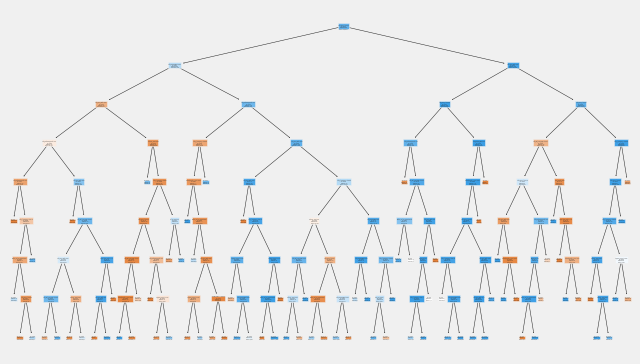

In [147]:
tree = plt.figure(figsize=(10, 6))
plot_tree(best_tree, feature_names=df_train.columns[:-1], filled=True);

----------------

### Overfitting

In [219]:
from sklearn.tree import DecisionTreeRegressor

In [229]:
results = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [230]:
results_df = pd.DataFrame(results)

In [231]:
results_df

model  depth  train_error  test_error
0    DecisionTreeRegressor(max_depth=1)      1     0.109496    0.110621
1    DecisionTreeRegressor(max_depth=2)      2     0.086120    0.086922
2    DecisionTreeRegressor(max_depth=3)      3     0.064807    0.071066
3    DecisionTreeRegressor(max_depth=4)      4     0.054820    0.063761
4    DecisionTreeRegressor(max_depth=5)      5     0.043940    0.054662
5    DecisionTreeRegressor(max_depth=6)      6     0.034616    0.050950
6    DecisionTreeRegressor(max_depth=7)      7     0.026928    0.049324
7    DecisionTreeRegressor(max_depth=8)      8     0.020233    0.050431
8    DecisionTreeRegressor(max_depth=9)      9     0.014329    0.050029
9   DecisionTreeRegressor(max_depth=10)     10     0.009493    0.051984
10  DecisionTreeRegressor(max_depth=11)     11     0.006049    0.055136
11  DecisionTreeRegressor(max_depth=12)     12     0.003695    0.063362
12  DecisionTreeRegressor(max_depth=13)     13     0.002227    0.060093
13  DecisionTreeRegressor(max_depth=14)     14     0.001565    0.056600
14  DecisionTreeRegressor(max_depth=15)     15     0.000727    0.057129
15  DecisionTreeRegressor(max_depth=16)     16     0.000123    0.059864
16  DecisionTreeRegressor(max_depth=17)     17     0.000000    0.061690
17  DecisionTreeRegressor(max_depth=18)     18     0.000000    0.060457
18  DecisionTreeRegressor(max_depth=19)     19     0.000000    0.060457
19  DecisionTreeRegressor(max_depth=20)     20     0.000000    0.059223

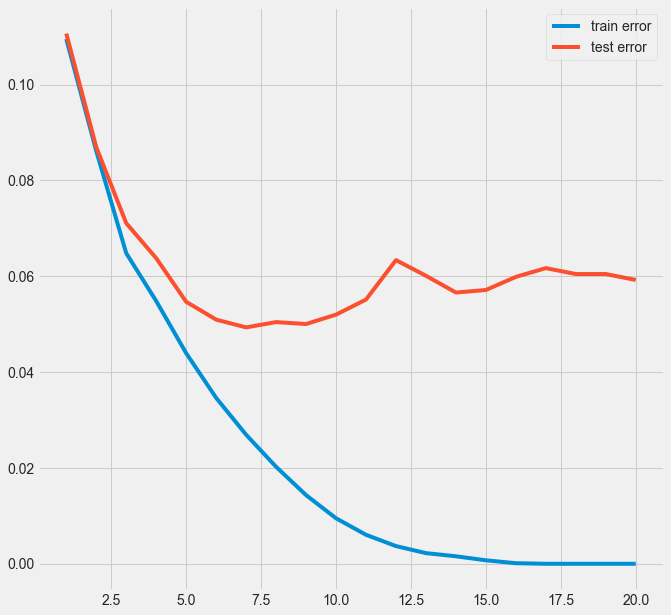

In [232]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

--------------

In [233]:
X.shape

(8101, 31)

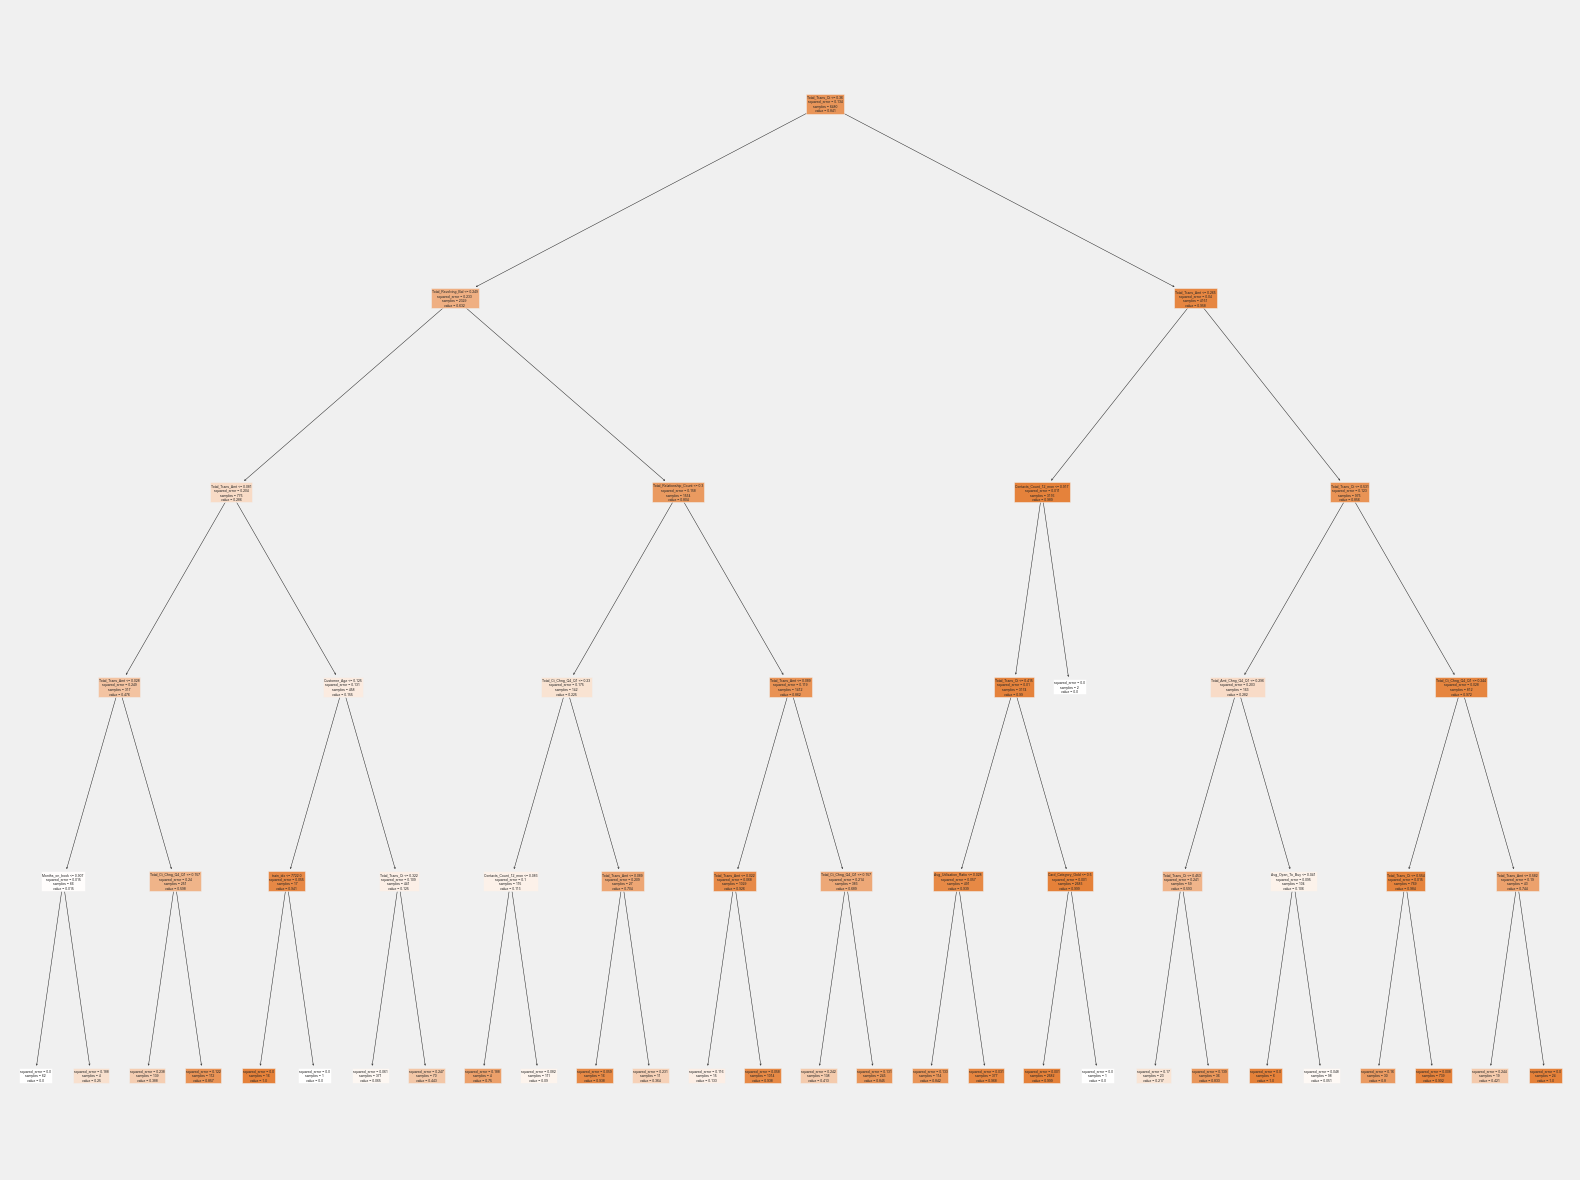

In [234]:
fig = plt.figure(figsize=(25,20))
plot_tree(results_df.loc[4].model, feature_names=df_train.columns[:-1], filled=True);

In [228]:
fig.savefig("depth5.svg")

Variables más importantes: **Total_Trans_Ct, Total_Trans_Amt, Contacts_Count_12_mon, Card_Category_Gold**

### Random forest classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "max_depth": [4, 5, 6, 7, 8],
        "min_samples_split": [20, 50, 70, 100],
    },
    cv=5,
    verbose=1,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [241]:
rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [10, 50, 70, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [242]:
rf_test_score = accuracy_score(
    y_pred=rf.predict(X_test),
    y_true=y_test
)

In [243]:
print(f'The test score with random forest is {rf_test_score.round(3)}')

The test score with random forest is 0.933


--------------

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

In [253]:
gb = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid={
        "max_depth": [4, 6, 8, 10],
        "min_samples_split": [20, 50, 70, 100],
    },
    cv=5,
    verbose=1,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [254]:
gb.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [20, 50, 70, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [255]:
gb_test_score = accuracy_score(
    y_pred=gb.predict(X_test),
    y_true=y_test
)

In [256]:
print(f'The test score with gradient boosting is {gb_test_score.round(3)}')

The test score with gradient boosting is 0.971


---------------

### Aplicar sobre test

In [316]:
df_test_copy = df_test.copy()

In [317]:
df_test_copy.head()

test_idx  CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0         0  719455083            48      F                3      Uneducated   
1         1  773503308            59      M                1      Uneducated   
2         2  715452408            37      F                2        Graduate   
3         3  711264033            47      M                3       Doctorate   
4         4  718943508            42      M                3         Unknown   

  Marital_Status Income_Category Card_Category  Months_on_book  ...  \
0         Single  Less than $40K          Blue              39  ...   
1         Single  Less than $40K          Blue              53  ...   
2       Divorced  Less than $40K          Blue              36  ...   
3       Divorced     $40K - $60K          Blue              36  ...   
4         Single    $80K - $120K          Blue              33  ...   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       3                      4        2991.0   
1                       5                      4        2192.0   
2                       3                      3        1734.0   
3                       2                      3        4786.0   
4                       3                      2        3714.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                 1508           1483.0                 0.703   
1                 1569            623.0                 0.706   
2                  987            747.0                 0.879   
3                 1516           3270.0                 0.940   
4                 2170           1544.0                 0.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             3734              64                0.882                  0.504  
1             4010              79                0.717                  0.716  
2             4727              67                0.914                  0.569  
3             4973              74                0.850                  0.317  
4             1454              35                0.522                  0.584  

[5 rows x 21 columns]

In [318]:
df_test_copy.columns

Index(['test_idx', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [319]:
# cambio de valores Unknown a NaN
df_test_copy.replace('Unknown', np.nan, inplace=True)

In [320]:
df_test_copy = pd.get_dummies(df_test_copy, columns=["Gender", "Education_Level", 
                                             "Marital_Status", "Income_Category",
                                             "Card_Category"], drop_first=True)

In [321]:
# Seleccionar las columnas que se desean normalizar
columns_to_normalize = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                        'Total_Relationship_Count', 'Months_Inactive_12_mon',
                        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
                       ]

In [322]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

In [323]:
# Ajustar y transformar las columnas seleccionadas
df_test_copy[columns_to_normalize] = scaler.fit_transform(df_test_copy[columns_to_normalize])

In [324]:
x_test = df_test_copy

In [325]:
x_test.columns

Index(['test_idx', 'CLIENTNUM', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [326]:
x_test.isnull().sum()

test_idx                          0
CLIENTNUM                         0
Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $4

In [327]:
x_df = df_train.drop('Attrition_Flag', axis=1)
y_df = df_train.Attrition_Flag

In [328]:
model = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid={
        "max_depth": [4, 6, 8, 10],
        "min_samples_split": [20, 50, 70, 100],
    },
    cv=5,
    verbose=1,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [329]:
model.fit(x_df,y_df)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [20, 50, 70, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [330]:
gb_test_score = accuracy_score(
    y_pred=model.predict(X_test),
    y_true=y_test
)

In [331]:
print(f'The test score with gradient boosting is {gb_test_score.round(3)}')

The test score with gradient boosting is 0.998


In [332]:
x_test.shape

(2026, 31)

In [333]:
x_df.shape

(8101, 31)

In [334]:
y_pred = model.predict(x_test)
y_pred

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- test_idx
Feature names seen at fit time, yet now missing:
- train_idx

  warnings.warn(message, FutureWarning)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [335]:
model.score(x_test, y_pred)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- test_idx
Feature names seen at fit time, yet now missing:
- train_idx

  warnings.warn(message, FutureWarning)


-0.0

In [336]:
data=pd.DataFrame(y_pred, columns=['Attrition_Flag'])

In [337]:
data2=pd.DataFrame(df_test_copy.test_idx)

In [338]:
result=pd.concat([data2,data], axis=1)
result

test_idx  Attrition_Flag
0            0               1
1            1               1
2            2               1
3            3               1
4            4               1
...        ...             ...
2021      2021               1
2022      2022               0
2023      2023               1
2024      2024               1
2025      2025               1

[2026 rows x 2 columns]

In [339]:
import json

test_data = result[['test_idx', 'Attrition_Flag']]
test_data = test_data.rename(columns={'Attrition_Flag': 'target'})

test_dict = test_data.set_index('test_idx').to_dict()['target']

json_data = {'target': test_dict}

with open('predictions.json', 'w') as f:
    json.dump(json_data, f)

print('JSON data saved to predictions.json')

JSON data saved to predictions.json
